Zadanie 1

Tak, jeśli wybierze się te kierunki w których występuje największa zmienność. należy rozpatrzeć dane z przestrzeni 50 wymiarowej ale takie które leżą tylko w 2 wymiarach. Czyli zestaw danych o 50 cechach ale tylko 2 cechy dają jakiekolwiek informacje.

Zadanie 2

In [1]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [2]:
iris = datasets.load_iris()

In [3]:
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)


In [4]:
pca = PCA(2)
digits2d = pca.fit_transform(iris.data)
print(iris.data.shape)

(150, 4)


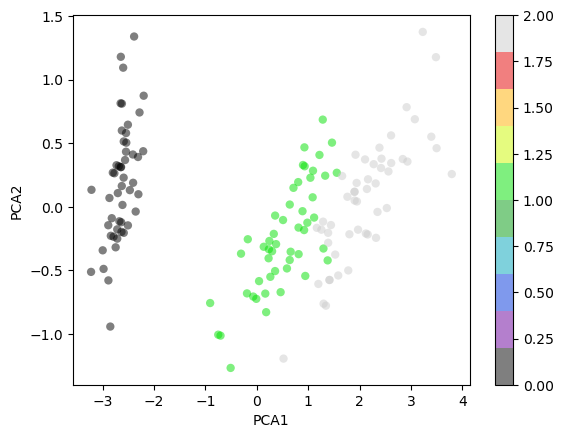

In [5]:
plt.scatter(digits2d[:,0], digits2d[:,1],
            c = iris.target, edgecolor = "none", alpha = 0.5,
            cmap = plt.cm.get_cmap('nipy_spectral',10))

plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.colorbar()
plt.show()

In [6]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.72579526, 0.23647866, 0.03261546, 0.00511061])

Najistotniejsza jest pierwsza cech opisuje dane na ponad 73%. Dwie pierwsze komponenty opisują dane w ponad 95%

Zadanie3: Rozważ jeszcze raz dane dotyczące twarzy różnych osób (fetch_lw_people) rozważane podczas ćwiczenia z SVM. Zastosuj podobnie jak wtedy PCA ze 150 komponentnami. Jaki procent wariancji opisują te komponenty? Narsuj kilka początkowych komponentów (wektory własne); oczywiście podobnie jak obrazy są to wektory  wymiarowe - przed narysowaniem należy jeszcze zastosować metodę reshape. Zastanów się nad ich interpretacją.

In [7]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

faces = fetch_lfw_people(min_faces_per_person = 60)

In [8]:
X = faces.data
y = faces.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)


In [9]:
pca = PCA(2)
digits2d = pca.fit_transform(faces.data)

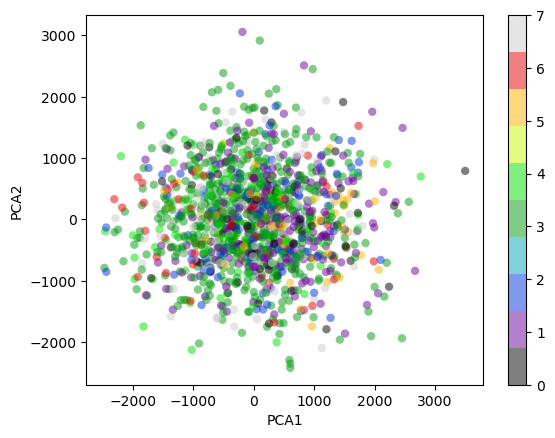

In [10]:
plt.scatter(digits2d[:,0], digits2d[:,1],
            c = faces.target, edgecolor = "none", alpha = 0.5,
            cmap = plt.cm.get_cmap('nipy_spectral',10))

plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.colorbar()
plt.show()

In [11]:
pca = PCA(n_components=150)
X_train_pca = pca.fit_transform(X_train_std)
arr = pca.explained_variance_ratio_

In [12]:
def sum(arr):
    sum = 0
    for i in arr:
        sum = sum + i
    return(sum)

In [13]:
sum(arr)

0.9495253758796025

Te 150 komponentów opisuje 94,8% wariancji

Zadanie 4

Algorytm PCA nie widzi wyjściowyej formy danych, nie wie przez jaką kombinację współczynników przy funkcjach opisujących drgania powstały przekształcenia. 